In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/penguins.csv',index_col=0)

In [3]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [5]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
data=data[data['species']!='Chinstrap']

In [7]:
data.iloc[:,[2,3,4,5,7]].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.543166,0.870276,0.876786,0.063172
bill_depth_mm,-0.543166,1.000000,-0.634645,-0.483227,-0.033169
flipper_length_mm,0.870276,-0.634645,1.000000,0.884427,0.125260
body_mass_g,0.876786,-0.483227,0.884427,1.000000,0.005869
year,0.063172,-0.033169,0.125260,0.005869,1.000000


<Figure size 2000x2000 with 0 Axes>

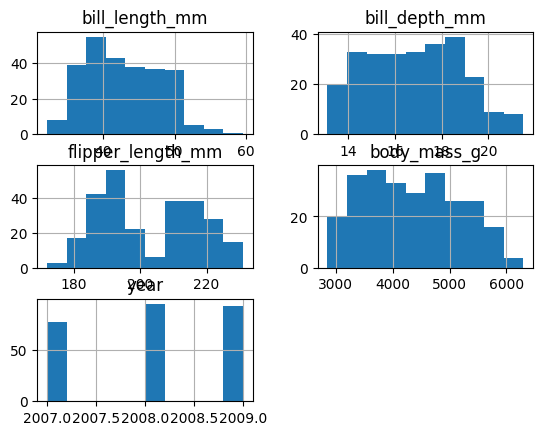

In [8]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

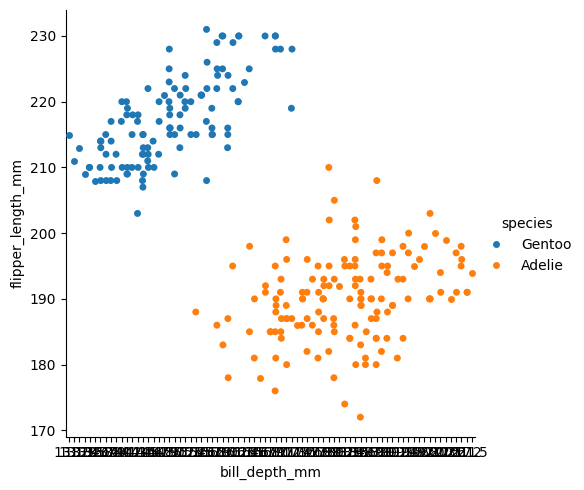

In [9]:
sns.catplot(data=data,x='bill_depth_mm',y='flipper_length_mm',hue='species')

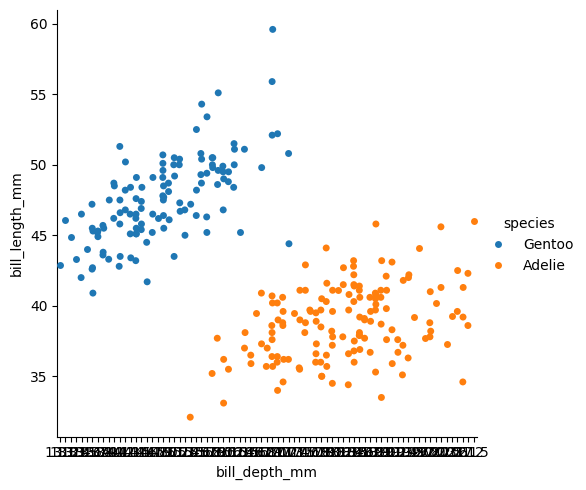

In [10]:
sns.catplot(data=data,x='bill_depth_mm',y='bill_length_mm',hue='species')


In [45]:
def sigmoid(z):
  return 1/1+np.exp(-z)

In [30]:
x = data[['flipper_length_mm','bill_depth_mm']].to_numpy()
y =  data['species'].map({'Adelie':0,'Gentoo':1}).to_numpy()


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(212, 2) (53, 2) (212,) (53,)


In [34]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
model.score(x_test,y_test)

1.0

In [36]:
if model.predict([[42.5,15]])==0:
  print('Adelie')
else:
  print('Gentoo')


Adelie


In [50]:
a=model.coef_[0]
b=model.intercept_
a,b


(array([ 0.49847657, -1.47451023]), array([-78.68951592]))

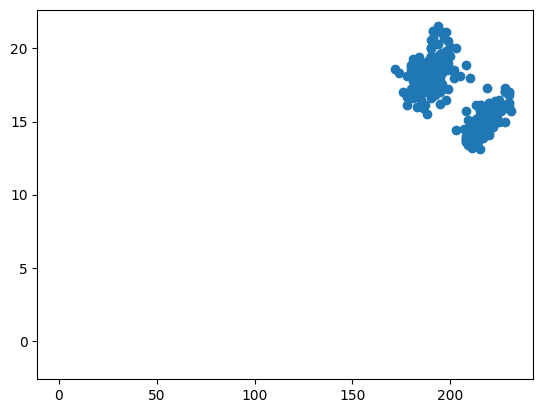

In [43]:
plt.scatter(x[:,0], x[:,1])
plt.plot(x[0],sigmoid(b+))


